In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [50]:
social = pd.read_csv('FinalDataSet.csv', index_col = 0)
social.head()

,Date,Reddit Post Count,Twitter Post Count,Company,Reddit Upvote Sum,Open,Close,Volume,Returns
0,20-07-01,1,317034,FB,0,228.0,238.0,43399740,0.044
1,20-07-02,2,297197,FB,12,239.0,233.0,30633620,-0.025
2,20-07-06,0,278204,FB,0,234.0,240.0,26206158,0.026
3,20-07-07,1,309570,FB,2,239.0,241.0,27887786,0.008
4,20-07-08,3,338002,FB,81,238.0,244.0,29791340,0.025


In [52]:
social['Company'].unique()

array(['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG'], dtype=object)

In [113]:
ones = pd.Series(np.ones(64))
t = pd.concat([X,ones], axis = 1)
t.values

array([[         nan,  1.00000e+00],
       [-1.98370e+04,  1.00000e+00],
       [-1.89930e+04,  1.00000e+00],
       [ 3.13660e+04,  1.00000e+00],
       [ 2.84320e+04,  1.00000e+00],
       [-5.25140e+04,  1.00000e+00],
       [ 4.38620e+04,  1.00000e+00],
       [-7.44700e+03,  1.00000e+00],
       [-7.52600e+03,  1.00000e+00],
       [-4.20000e+03,  1.00000e+00],
       [-1.05200e+04,  1.00000e+00],
       [-1.04280e+04,  1.00000e+00],
       [ 1.42340e+04,  1.00000e+00],
       [-2.31940e+04,  1.00000e+00],
       [ 2.07150e+04,  1.00000e+00],
       [-4.66800e+03,  1.00000e+00],
       [-1.55120e+04,  1.00000e+00],
       [ 2.10300e+04,  1.00000e+00],
       [ 5.88330e+04,  1.00000e+00],
       [-2.44980e+04,  1.00000e+00],
       [-3.19380e+04,  1.00000e+00],
       [-2.58140e+04,  1.00000e+00],
       [ 1.10900e+04,  1.00000e+00],
       [ 1.15980e+05,  1.00000e+00],
       [-5.21200e+04,  1.00000e+00],
       [ 1.83600e+03,  1.00000e+00],
       [ 6.87300e+03,  1.00000e+00],
 

In [104]:
facebook = social.loc[social['Company'] == 'FB']
X = facebook['Twitter Post Count'].diff()[1:]
y = facebook['Returns'][1:] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)


facebook_fit = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)
facebook_fit.score(X_test.values.reshape(-1,1),y_test)

-0.5711129491918101

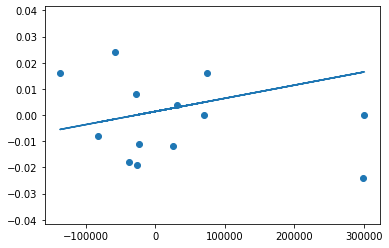

In [83]:
plt.scatter(X_test.values, y_test)
plt.plot(X_test.values, facebook_fit.predict(X_test.values.reshape(-1,1)))

In [84]:
apple = social.loc[social['Company'] == 'AAPL']
X = apple['Twitter Post Count'].diff()[1:]
y = apple['Returns'][1:] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)


apple_fit = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)
apple_fit.score(X_test.values.reshape(-1,1),y_test)

-0.11213299332669147

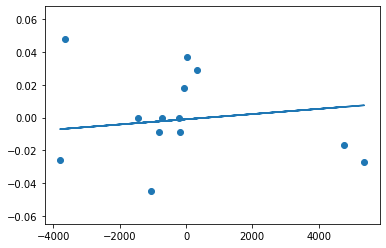

In [85]:
plt.scatter(X_test.values, y_test)
plt.plot(X_test.values, apple_fit.predict(X_test.values.reshape(-1,1)))

In [86]:
amazon = social.loc[social['Company'] == 'AMZN']
X = amazon['Twitter Post Count'].diff()[1:]
y = amazon['Returns'][1:] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)


amazon_fit = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)
amazon_fit.score(X_test.values.reshape(-1,1),y_test)

0.059041589239410615

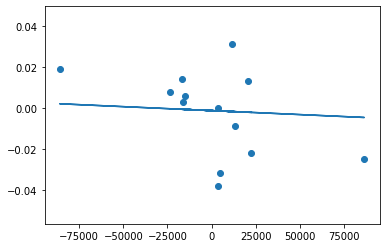

In [87]:
plt.scatter(X_test.values, y_test)
plt.plot(X_test.values, amazon_fit.predict(X_test.values.reshape(-1,1)))

In [88]:
netflix = social.loc[social['Company'] == 'NFLX']
X = netflix['Twitter Post Count'].diff()[1:]
y = netflix['Returns'][1:] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)


netflix_fit = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)
netflix_fit.score(X_test.values.reshape(-1,1),y_test)

0.03801843411065109

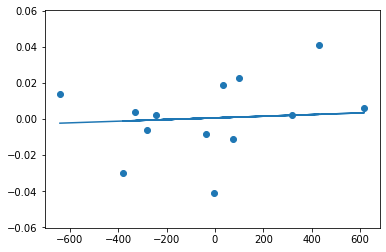

In [89]:
plt.scatter(X_test.values, y_test)
plt.plot(X_test.values, netflix_fit.predict(X_test.values.reshape(-1,1)))

In [90]:
google = social.loc[social['Company'] == 'GOOG']
X = google['Twitter Post Count'].diff()[1:]
y = google['Returns'][1:] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = False)


google_fit = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)
google_fit.score(X_test.values.reshape(-1,1),y_test)

-0.3713291179289482

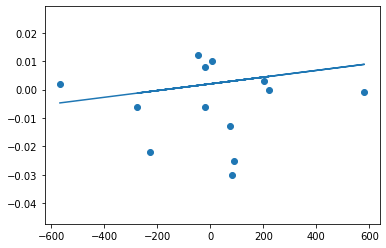

In [91]:
plt.scatter(X_test.values, y_test)
plt.plot(X_test.values, google_fit.predict(X_test.values.reshape(-1,1)))

# Polynomial Transformation

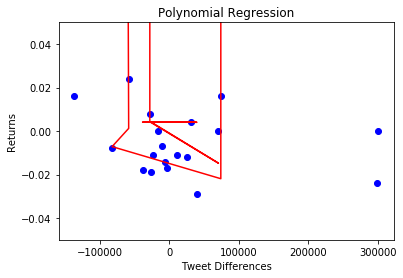

In [145]:
X = facebook['Twitter Post Count'].diff()[1:]
y = facebook['Returns'][1:] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle = False)

poly = PolynomialFeatures(degree = 10) 
X_poly = poly.fit_transform(X_train.values.reshape(-1, 1)) 
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)

# Visualising the Polynomial Regression results 
plt.scatter(X_test, y_test, color = 'blue') 
  
plt.plot(X_test.values, lin2.predict(poly.fit_transform(X_test.values.reshape(-1,1))), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Tweet Differences') 
plt.ylabel('Returns') 
plt.ylim(-0.05,0.05)
  
plt.show() 


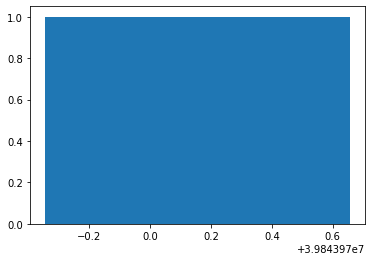

In [153]:
plt.hist(mean_squared_error(y_test, lin2.predict(poly.fit_transform(X_test.values.reshape(-1,1)))), bins='auto)
plt.show()